<a id="top"></a>
<div style="text-align: center; background: #1ED760; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Lab 02</br></br> <I style = "font-size: 20px">by: Ahmed Sharaf</I></div>



> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>1 | Import Libraries</b></span>

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>2 | Helper Functions</b></span>

In [14]:
def fit(x: np.array, y: np.array, lr: float = 0.001, epochs: int = 1000):
    m = x.shape[0]
    cost = []
    grads = []
    theta = np.zeros(shape=(x.shape[1],1))
    for iteration in range(epochs):
        y_hat = x @ theta
        error = y_hat - y.reshape((-1, 1))
        current_cost = (1 / (2 * m)) * np.sum(np.pow(error, 2))
        if np.isnan(current_cost) or np.isinf(current_cost):
            break
        cost.append(current_cost)
        gradient = (1 / m) * x.T @ error
        grads.append(np.linalg.norm(gradient))
        theta -= (lr * gradient)
    return (cost, grads)

In [15]:
def plot(unscaled: list, scaled: list, xlabel: str, ylabel: str, label_one: str, label_two: str, title: str, lr: list, log: bool):
    fig, axes = plt.subplots(2, 5, figsize=(22, 8))
    for col, alpha in enumerate(lr):
        unscale = unscaled[col]
        scale = scaled[col]

        axes[0, col].plot(unscale)
        axes[0, col].set_title(f"alpha = {alpha}")
        axes[0, col].set_xlabel(xlabel)
        axes[0, col].set_ylabel(ylabel)

        axes[1, col].plot(scale)
        axes[1, col].set_title(f"alpha = {alpha}")
        axes[1, col].set_xlabel(xlabel)
        axes[1, col].set_ylabel(ylabel)

        if log:
            axes[0, col].set_yscale('log')
            axes[1, col].set_yscale('log')

    axes[0, 0].set_ylabel(label_one)
    axes[1, 0].set_ylabel(label_two)

    plt.suptitle(title, fontsize=17)
    plt.tight_layout()
    plt.show()


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>3 | Configurations</b></span>

In [16]:
EPOCHS = 100
lr = [1, 0.1, 0.01, 0.001, 0.0001]


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>4 | Import Data</b></span>

In [17]:
data = pd.read_csv('MultipleLR.csv', header=None, names=["X1", "X2", "X3", "Y"])
data.head()

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>5 | Feature Scaling</b></span>

In [19]:
scaler = StandardScaler()
X_scaled = np.block([np.ones((X.shape[0], 1)), scaler.fit_transform(X)])
X_scaled

array([[ 1.        , -0.5020131 ,  0.04244515, -0.56212061],
       [ 1.        ,  1.16028194,  0.69544741,  0.99932553],
       [ 1.        ,  0.82782293,  0.94032326,  0.73908451],
       [ 1.        ,  1.40962619,  1.51170024,  1.60655458],
       [ 1.        , -0.5020131 , -1.10030881, -0.99585565],
       [ 1.        , -2.16430814, -2.73281447, -2.29706076],
       [ 1.        , -0.83447211, -0.44730655, -0.38862659],
       [ 1.        , -2.66299665, -1.91656164, -1.86332573],
       [ 1.        ,  0.66159343, -0.03918014,  0.73908451],
       [ 1.        , -0.00332459, -0.77380768,  0.56559049],
       [ 1.        , -0.83447211, -0.77380768, -0.73561463],
       [ 1.        , -0.75135736, -1.1819341 , -0.64886762],
       [ 1.        ,  1.16028194,  1.26682439,  0.82583151],
       [ 1.        , -0.00332459,  0.04244515, -0.73561463],
       [ 1.        , -0.75135736, -0.52893183, -0.30187959],
       [ 1.        ,  1.16028194,  0.77707269,  1.25956655],
       [ 1.        , -0.

In [20]:
X_unscaled = np.block([np.ones((X.shape[0], 1)), X])
X_unscaled

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>6 | Training</b></span>

In [21]:
results = {
    "cost_unscaled": [],
    "cost_scaled": [],
    "grads_unscaled": [],
    "grads_scaled": []
}

for alpha in lr:
    cost_unscaled, grads_unscaled = fit(X_unscaled, y, alpha, EPOCHS)
    cost_scaled, grads_scaled = fit(X_scaled, y, alpha, EPOCHS)
    results['cost_unscaled'].append(cost_unscaled)
    results['cost_scaled'].append(cost_scaled)
    results['grads_unscaled'].append(grads_unscaled)
    results['grads_scaled'].append(grads_scaled)

In [22]:
for k in results.keys():
    for i, v in enumerate(results[k]):
        print(f"Length of {k} is {len(v)} in lr = {lr[i]}")
    

Length of cost_unscaled is 36 in lr = 1
Length of cost_unscaled is 46 in lr = 0.1
Length of cost_unscaled is 67 in lr = 0.01
Length of cost_unscaled is 100 in lr = 0.001
Length of cost_unscaled is 100 in lr = 0.0001
Length of cost_scaled is 100 in lr = 1
Length of cost_scaled is 100 in lr = 0.1
Length of cost_scaled is 100 in lr = 0.01
Length of cost_scaled is 100 in lr = 0.001
Length of cost_scaled is 100 in lr = 0.0001
Length of grads_unscaled is 36 in lr = 1
Length of grads_unscaled is 46 in lr = 0.1
Length of grads_unscaled is 67 in lr = 0.01
Length of grads_unscaled is 100 in lr = 0.001
Length of grads_unscaled is 100 in lr = 0.0001
Length of grads_scaled is 100 in lr = 1
Length of grads_scaled is 100 in lr = 0.1
Length of grads_scaled is 100 in lr = 0.01
Length of grads_scaled is 100 in lr = 0.001
Length of grads_scaled is 100 in lr = 0.0001


> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>7 | plots</b></span>

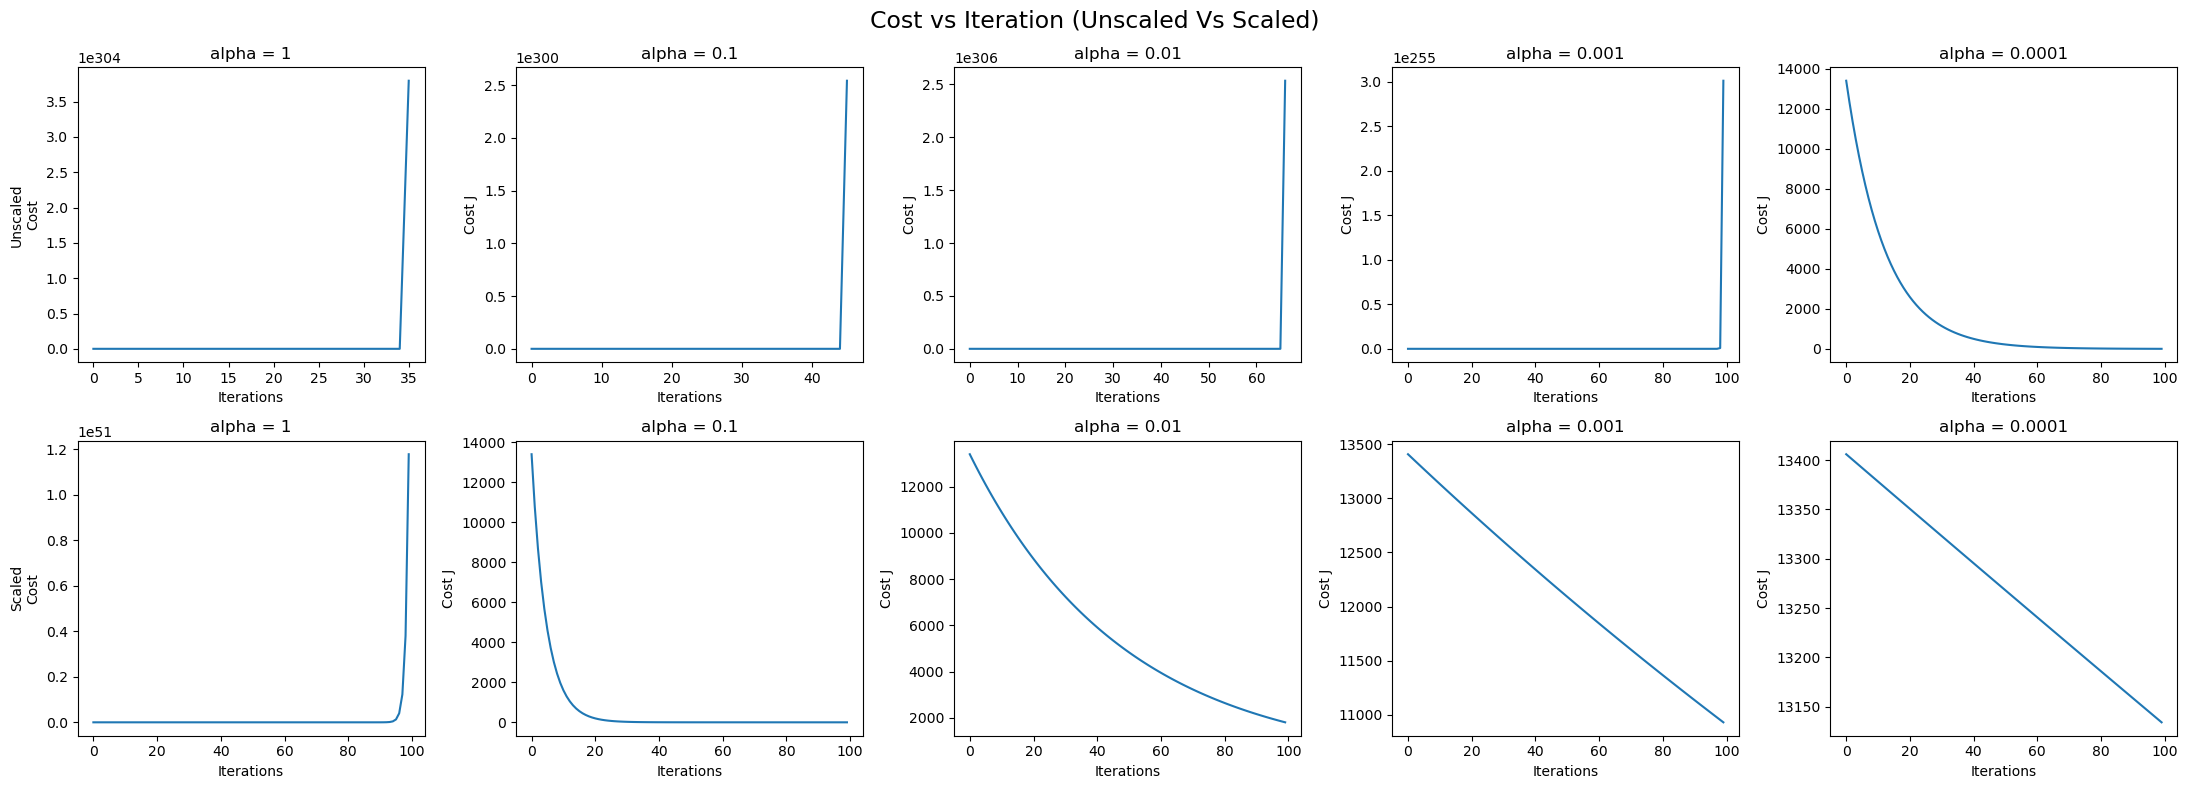

In [26]:
plot(
    results['cost_unscaled'], 
    results['cost_scaled'], 
    xlabel="Iterations", 
    ylabel="Cost J", 
    label_one="Unscaled\nCost", 
    label_two="Scaled\nCost", 
    title="Cost vs Iteration (Unscaled Vs Scaled)", 
    lr = lr,
    log=False)

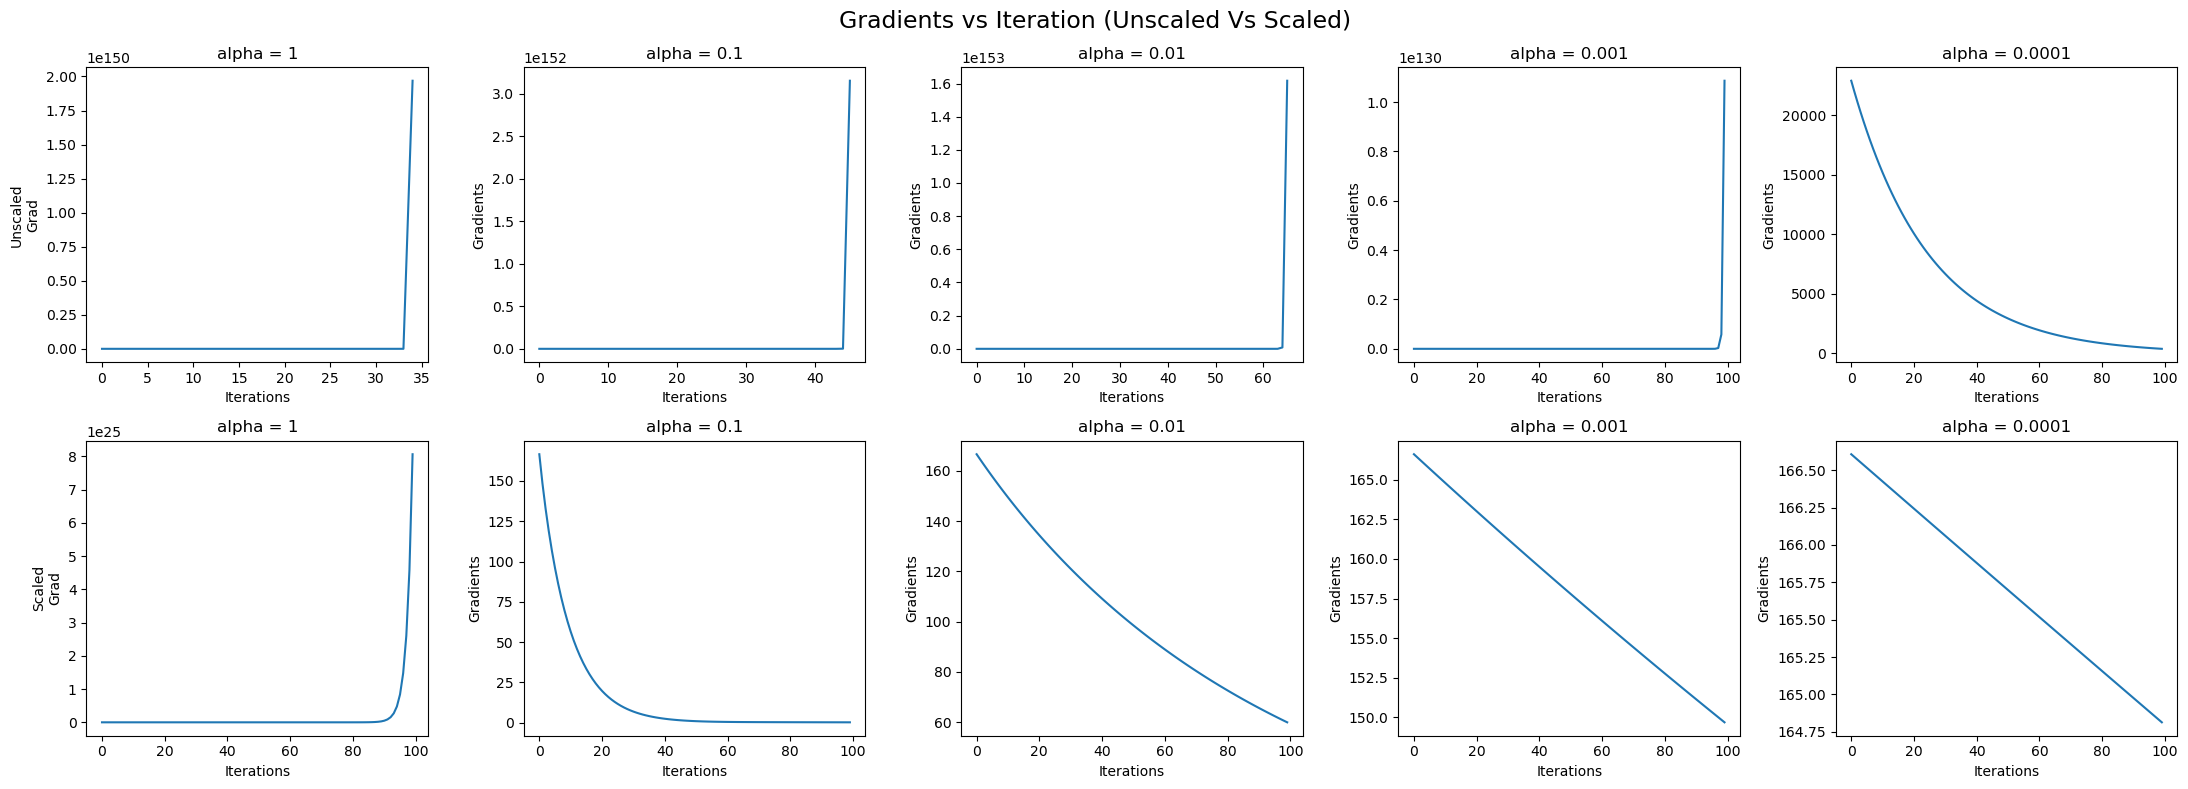

In [27]:
plot(
    results['grads_unscaled'], 
    results['grads_scaled'], 
    xlabel="Iterations", 
    ylabel="Gradients", 
    label_one="Unscaled\nGrad", 
    label_two="Scaled\nGrad", 
    title="Gradients vs Iteration (Unscaled Vs Scaled)", 
    lr = lr,
    log=False)

> <span style='font-size:15px; font-family:Verdana;color: #FF00CC;'><b>8 | Conclusion</b></span>

### 1. Unscaled Features
- For **large learning rates (α = 1, 0.1)**:
  - The cost explodes rapidly -> reaching extremely large values or infinity
  - The gradient norm also explodes -> indicating unstable updates
  - Gradient Descent diverges and becomes numerically unstable
- For **moderate learning rates (α = 0.01)**:
  - The algorithm may look stable at first
  - After several iterations cost diverge
- For **small learning rates (α = 0.001, 0.0001)**:
  - Training remains numerically stable
  - Cost and gradient norms decrease very slowly
  - Convergence is extremely slow and inefficient

---

### 2. Scaled Features
- For **large learning rates (α = 1)**:
  - Divergence still occurs
  - However it happens much later compared to the unscaled case

- For **moderate learning rates (α = 0.1, 0.01)**:
  - Stable and smooth convergence
  - Cost decreases rapidly and consistently
  - Gradient norm shrinks steadily toward zero
  - These learning rates provide the best performance

- For **small learning rates (α = 0.001, 0.0001)**:
  - Training is very stable
  - Gradients decrease slowly
  - Convergence is correct but unnecessarily slow

---

### Summary
- **Feature scaling is essential for Gradient Descent**
  - Prevents exploding costs and gradients
  - Improves numerical stability
  - Enables faster and smoother convergence
- After scaling:
  - Moderate learning rates become effective
  - Learning rate sensitivity is greatly reduced
- Without scaling:
  - Gradient Descent is either unstable or painfully slow